# Clustering Stocks

Clustering groups objects based on similarity between the objects. The similarity is computed using object's features. 

In this example we take the open, high, low, close and volume of securities traded on a day to cluster the stocks. The code to get the stock quotes is available in another python notebook get_stock_quotes.ipynb in the same directory. 


### Ticker and company name dict

In [3]:
# kraft symbol has now changed from KFT to MDLZ in yahoo
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'MTU': 'Mitsubishi',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'Mc Donalds',
    'PEP': 'Pepsi',
    'MDLZ': 'Kraft Foods',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'WBA': 'Walgreen',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

### Read stock data

In [4]:
import pandas as pd

quotes = pd.read_csv('./data/stock_quotes.csv')

quotes.head()

,Date,minor,Open,High,Low,Close,Volume
0,2017-01-03,AAPL,115.80,116.33,114.76,116.15,28781865.0
1,2017-01-03,AIG,65.95,66.01,64.69,65.12,7321916.0
2,2017-01-03,AMZN,757.92,758.76,747.70,753.67,3521066.0
3,2017-01-03,AXP,74.89,75.75,74.74,75.35,5853881.0
4,2017-01-03,BA,156.30,157.14,155.21,156.97,3426113.0


### Scale stock data 

In [5]:
from sklearn.preprocessing import StandardScaler

## Leave out date and ticker name for clustering
quotes_values = quotes[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = StandardScaler()
quotes_scaled = pd.DataFrame(scaler.fit_transform(quotes_values), columns=quotes_values.columns)
quotes_scaled.head()

,Open,High,Low,Close,Volume
0,0.245604,0.244775,0.247256,0.250591,1.113594
1,-0.237814,-0.242211,-0.244607,-0.246691,-0.185114
2,6.472528,6.462074,6.464954,6.463159,-0.415133
3,-0.151119,-0.147950,-0.145881,-0.147001,-0.273956
4,0.638351,0.639725,0.644618,0.648378,-0.420879


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cfc9da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110c6bf28>]], dtype=object)

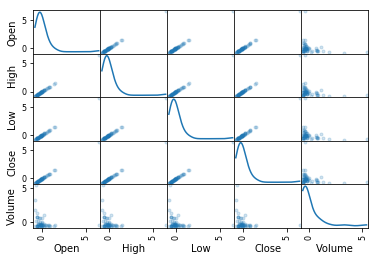

In [6]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix


scatter_matrix(quotes_scaled, alpha = 0.2, diagonal='kde')

### Cluster the data

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5)
model.fit(quotes_scaled)

quotes['Cluster'] = model.labels_

## Analyze the clusters

Label the clusters using domain knowledge

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111ee4240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11207b0f0>]], dtype=object)

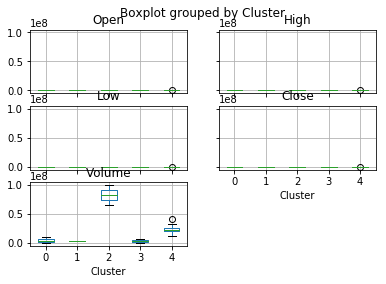

In [8]:
quotes.boxplot(by='Cluster', column=['Open', 'High', 'Low', 'Close', 'Volume'])

In [12]:
import numpy as np

tickers = quotes['minor'].values

names = []
for ticker in tickers:
    names.append(symbol_dict[ticker])
    
names = np.array(names)
labels = model.labels_
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: AIG, American express, Canon, Caterpillar, Colgate-Palmolive, ConocoPhillips, CVS, DuPont de Nemours, GlaxoSmithKline, Honda, Kellogg, Marriott, Kraft Foods, Mitsubishi, Navistar, Novartis, Pepsi, Procter Gamble, Ryder, SAP, Sony, Sanofi-Aventis, Total, Time Warner, Texas instruments, Unilever, Valero Energy, Walgreen, Wal-Mart, Exxon, Yahoo
Cluster 2: Amazon
Cluster 3: Bank of America, Xerox
Cluster 4: Boeing, Chevron, General Dynamics, Goldman Sachs, Home Depot, IBM, Kimberly-Clark, Mc Donalds, 3M, Northrop Grumman, Raytheon, Toyota
Cluster 5: Apple, Comcast, Cisco, Ford, General Electrics, HP, JPMorgan Chase, Coca Cola, Microsoft, Pfizer, Wells Fargo


## The End